In [1]:
import pandas as pd

import pygsheets
from datetime import date, timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#google_client = pygsheets.authorize(service_file='xxx')
#institutions_google_sheet = google_client.open('Institutions')

In [17]:
#PrimeMinisters = institutions_google_sheet.worksheet('title','PrimeMinisters').get_as_df()
PrimeMinisters = pd.read_csv('PrimeMinisters.csv')
PrimeMinisters['Term Started on'] = pd.to_datetime(PrimeMinisters['Term Started on'])
PrimeMinisters['Term Ended on'] = pd.to_datetime(PrimeMinisters['Term Ended on'])
PrimeMinisters['PM_unique'] = PrimeMinisters['PrimeMinister']+ PrimeMinisters.sno.astype(str)
PrimeMinisters.tail(10)

,sno,PrimeMinister,Constituency,Term Started on,Term Ended on,Term(Days),LS,Party,PM_unique
17,18,P. V. Narasimha Rao\n(1921–2004),Nandyal,1991-06-21,1996-05-16,1791,10th,INC,P. V. Narasimha Rao\n(1921–2004)18
18,19,Atal Bihari Vajpayee\n(1924–2018),Lucknow,1996-05-16,1996-06-01,16,11th,BJP,Atal Bihari Vajpayee\n(1924–2018)19
19,20,H. D. Deve Gowda\n(born 1933),Rajya Sabha MP for Karnataka,1996-06-01,1997-04-21,324,11th,JD,H. D. Deve Gowda\n(born 1933)20
20,21,Inder Kumar Gujral\n(1919–2012),Rajya Sabha MP for Bihar,1997-04-21,1998-03-19,332,11th,JD,Inder Kumar Gujral\n(1919–2012)21
21,22,Atal Bihari Vajpayee\n(1924–2018),Lucknow,1998-03-19,1999-10-13,573,12th,BJP,Atal Bihari Vajpayee\n(1924–2018)22
22,23,Atal Bihari Vajpayee\n(1924–2018),Lucknow,1999-10-13,2004-05-22,1683,13th,BJP,Atal Bihari Vajpayee\n(1924–2018)23
23,24,Manmohan Singh\n(born 1932),Rajya Sabha MP for Assam,2004-05-22,2009-05-22,1826,14th,INC,Manmohan Singh\n(born 1932)24
24,25,Manmohan Singh\n(born 1932),Rajya Sabha MP for Assam,2009-05-22,2014-05-26,1830,15th,INC,Manmohan Singh\n(born 1932)25
25,26,Narendra Modi\n(born 1950),Varanasi,2014-05-26,2019-05-30,1830,16th,BJP,Narendra Modi\n(born 1950)26
26,27,Narendra Modi\n(born 1950),Varanasi,2019-05-30,2023-03-04,1374,17th,BJP,Narendra Modi\n(born 1950)27


In [25]:
#ElectionCommissioners = institutions_google_sheet.worksheet('title','ElectionCommissioners').get_as_df()
ElectionCommissioners = pd.read_csv('ElectionCommissioners.csv')
ElectionCommissioners['Term Started on'] = pd.to_datetime(ElectionCommissioners['Term Started on'])
first_cec_appoined = ElectionCommissioners['Term Started on'][0]

ElectionCommissioners['Term Ended on'] = pd.to_datetime(ElectionCommissioners['Term Ended on'])

ElectionCommissioners['Term(years)']= ElectionCommissioners['Term(Days)']/365
ElectionCommissioners.head()

,id,CEC,Term Started on,Term Ended on,Term(Days),Term(years)
0,1,Sukumar Sen,1950-03-21,1958-12-19,3195,8.753425
1,2,Kalyan Sundaram,1958-12-20,1967-09-30,3206,8.783562
2,3,S. P. Sen Verma,1967-10-01,1972-09-30,1826,5.002740
3,4,Nagendra Singh,1972-10-01,1973-02-06,128,0.350685
4,5,T. Swaminathan,1973-02-07,1977-06-17,1591,4.358904


In [26]:
# Find the PM when the CEC was appointed
Appointing_PM_list = []
for idx, row in ElectionCommissioners.iterrows():
    for i, pm_term_end in enumerate(PrimeMinisters['Term Ended on']):
        if (row['Term Started on'] - pm_term_end).days < 0:
            Appointing_PM_list.append(PrimeMinisters['PM_unique'][i])
            break
ElectionCommissioners['PM_unique'] = Appointing_PM_list

In [27]:
ElectionCommissioners

,id,CEC,Term Started on,Term Ended on,Term(Days),Term(years),PM_unique
0,1,Sukumar Sen,1950-03-21,1958-12-19,3195,8.753425,Jawaharlal Nehru\n(1889–1964)1
1,2,Kalyan Sundaram,1958-12-20,1967-09-30,3206,8.783562,Jawaharlal Nehru\n(1889–1964)3
2,3,S. P. Sen Verma,1967-10-01,1972-09-30,1826,5.002740,Indira Gandhi\n(1917–1984)9
3,4,Nagendra Singh,1972-10-01,1973-02-06,128,0.350685,Indira Gandhi\n(1917–1984)10
4,5,T. Swaminathan,1973-02-07,1977-06-17,1591,4.358904,Indira Gandhi\n(1917–1984)10
5,6,S. L. Shakdhar,1977-06-18,1982-06-17,1825,5.000000,Morarji Desai\n(1896–1995)11
6,7,R. K. Trivedi,1982-06-18,1985-12-31,1292,3.539726,Indira Gandhi\n(1917–1984)13
7,8,R. V. S. Peri Sastri,1986-01-01,1990-11-25,1789,4.901370,Rajiv Gandhi\n(1944–1991)15
8,9,V. S. Ramadevi,1990-11-26,1990-12-11,15,0.041096,Chandra Shekhar\n(1927–2007)17
9,10,T. N. Seshan,1990-12-12,1996-12-11,2191,6.002740,Chandra Shekhar\n(1927–2007)17


In [28]:
ElectionCommissioners = ElectionCommissioners[['id','CEC','PM_unique',
                                               'Term(Days)','Term(years)']].merge(PrimeMinisters[['PM_unique', 'Term Started on', 'Party']]
                                                                                  , on='PM_unique')
ElectionCommissioners = ElectionCommissioners.sort_values(by='id')
ElectionCommissioners.head()

,id,CEC,PM_unique,Term(Days),Term(years),Term Started on,Party
0,1,Sukumar Sen,Jawaharlal Nehru\n(1889–1964)1,3195,8.753425,1947-08-15,INC
1,2,Kalyan Sundaram,Jawaharlal Nehru\n(1889–1964)3,3206,8.783562,1957-04-17,INC
2,3,S. P. Sen Verma,Indira Gandhi\n(1917–1984)9,1826,5.002740,1967-03-04,INC
3,4,Nagendra Singh,Indira Gandhi\n(1917–1984)10,128,0.350685,1971-03-15,INC
4,5,T. Swaminathan,Indira Gandhi\n(1917–1984)10,1591,4.358904,1971-03-15,INC


In [29]:
colors = []
colors2 = []

blues = ('#1e2f97', '#1aa7ec')
oranges = ('#fd5602', '#fedebe')
greys = ('#515151', '#b1b1b1')

inc=0
bjp=0
others=0
for idx, row in ElectionCommissioners.iterrows():
    if row['Party'] == 'INC':
        colors.append(blues[inc%2])
        colors2.append('#1aa7ec')
        inc=inc+1
    elif row['Party'] == 'BJP':
        colors.append(oranges[bjp%2])
        colors2.append('#ff8303')
        bjp=bjp+1
    else:
        colors.append(greys[others%2])
        others=others+1
        colors2.append('#b1b1b1')

In [30]:
ElectionCommissioners['PM'] = ElectionCommissioners['PM_unique'].apply(lambda x: x.split('\n')[0])

In [62]:
cols = ["PrimeMinister","Term Started on"]
PrimeMinisters_droppedconsecutive = PrimeMinisters[cols].loc[(PrimeMinisters['PrimeMinister'].shift() != PrimeMinisters['PrimeMinister'])]

PrimeMinisters_droppedconsecutive['PrimeMinister'] = PrimeMinisters_droppedconsecutive['PrimeMinister'].str.split('\n').str[0]

# Convert 'dates' column to datetime type
#df['dates'] = pd.to_datetime(df['dates'])

# Calculate the consecutive differences between dates in days
# Shift the dates by one row
PrimeMinisters_droppedconsecutive['previous_date'] = PrimeMinisters_droppedconsecutive['Term Started on'].shift(-1)
PrimeMinisters_droppedconsecutive['previous_date'].fillna(pd.Timestamp.today().normalize(), inplace=True)

PrimeMinisters_droppedconsecutive['Term'] = (PrimeMinisters_droppedconsecutive['previous_date'] - PrimeMinisters_droppedconsecutive['Term Started on']).dt.days
PrimeMinisters_droppedconsecutive.drop(columns=['previous_date'], inplace=True)

In [66]:
PrimeMinisters_droppedconsecutive = PrimeMinisters_droppedconsecutive[PrimeMinisters_droppedconsecutive.Term >= 365]

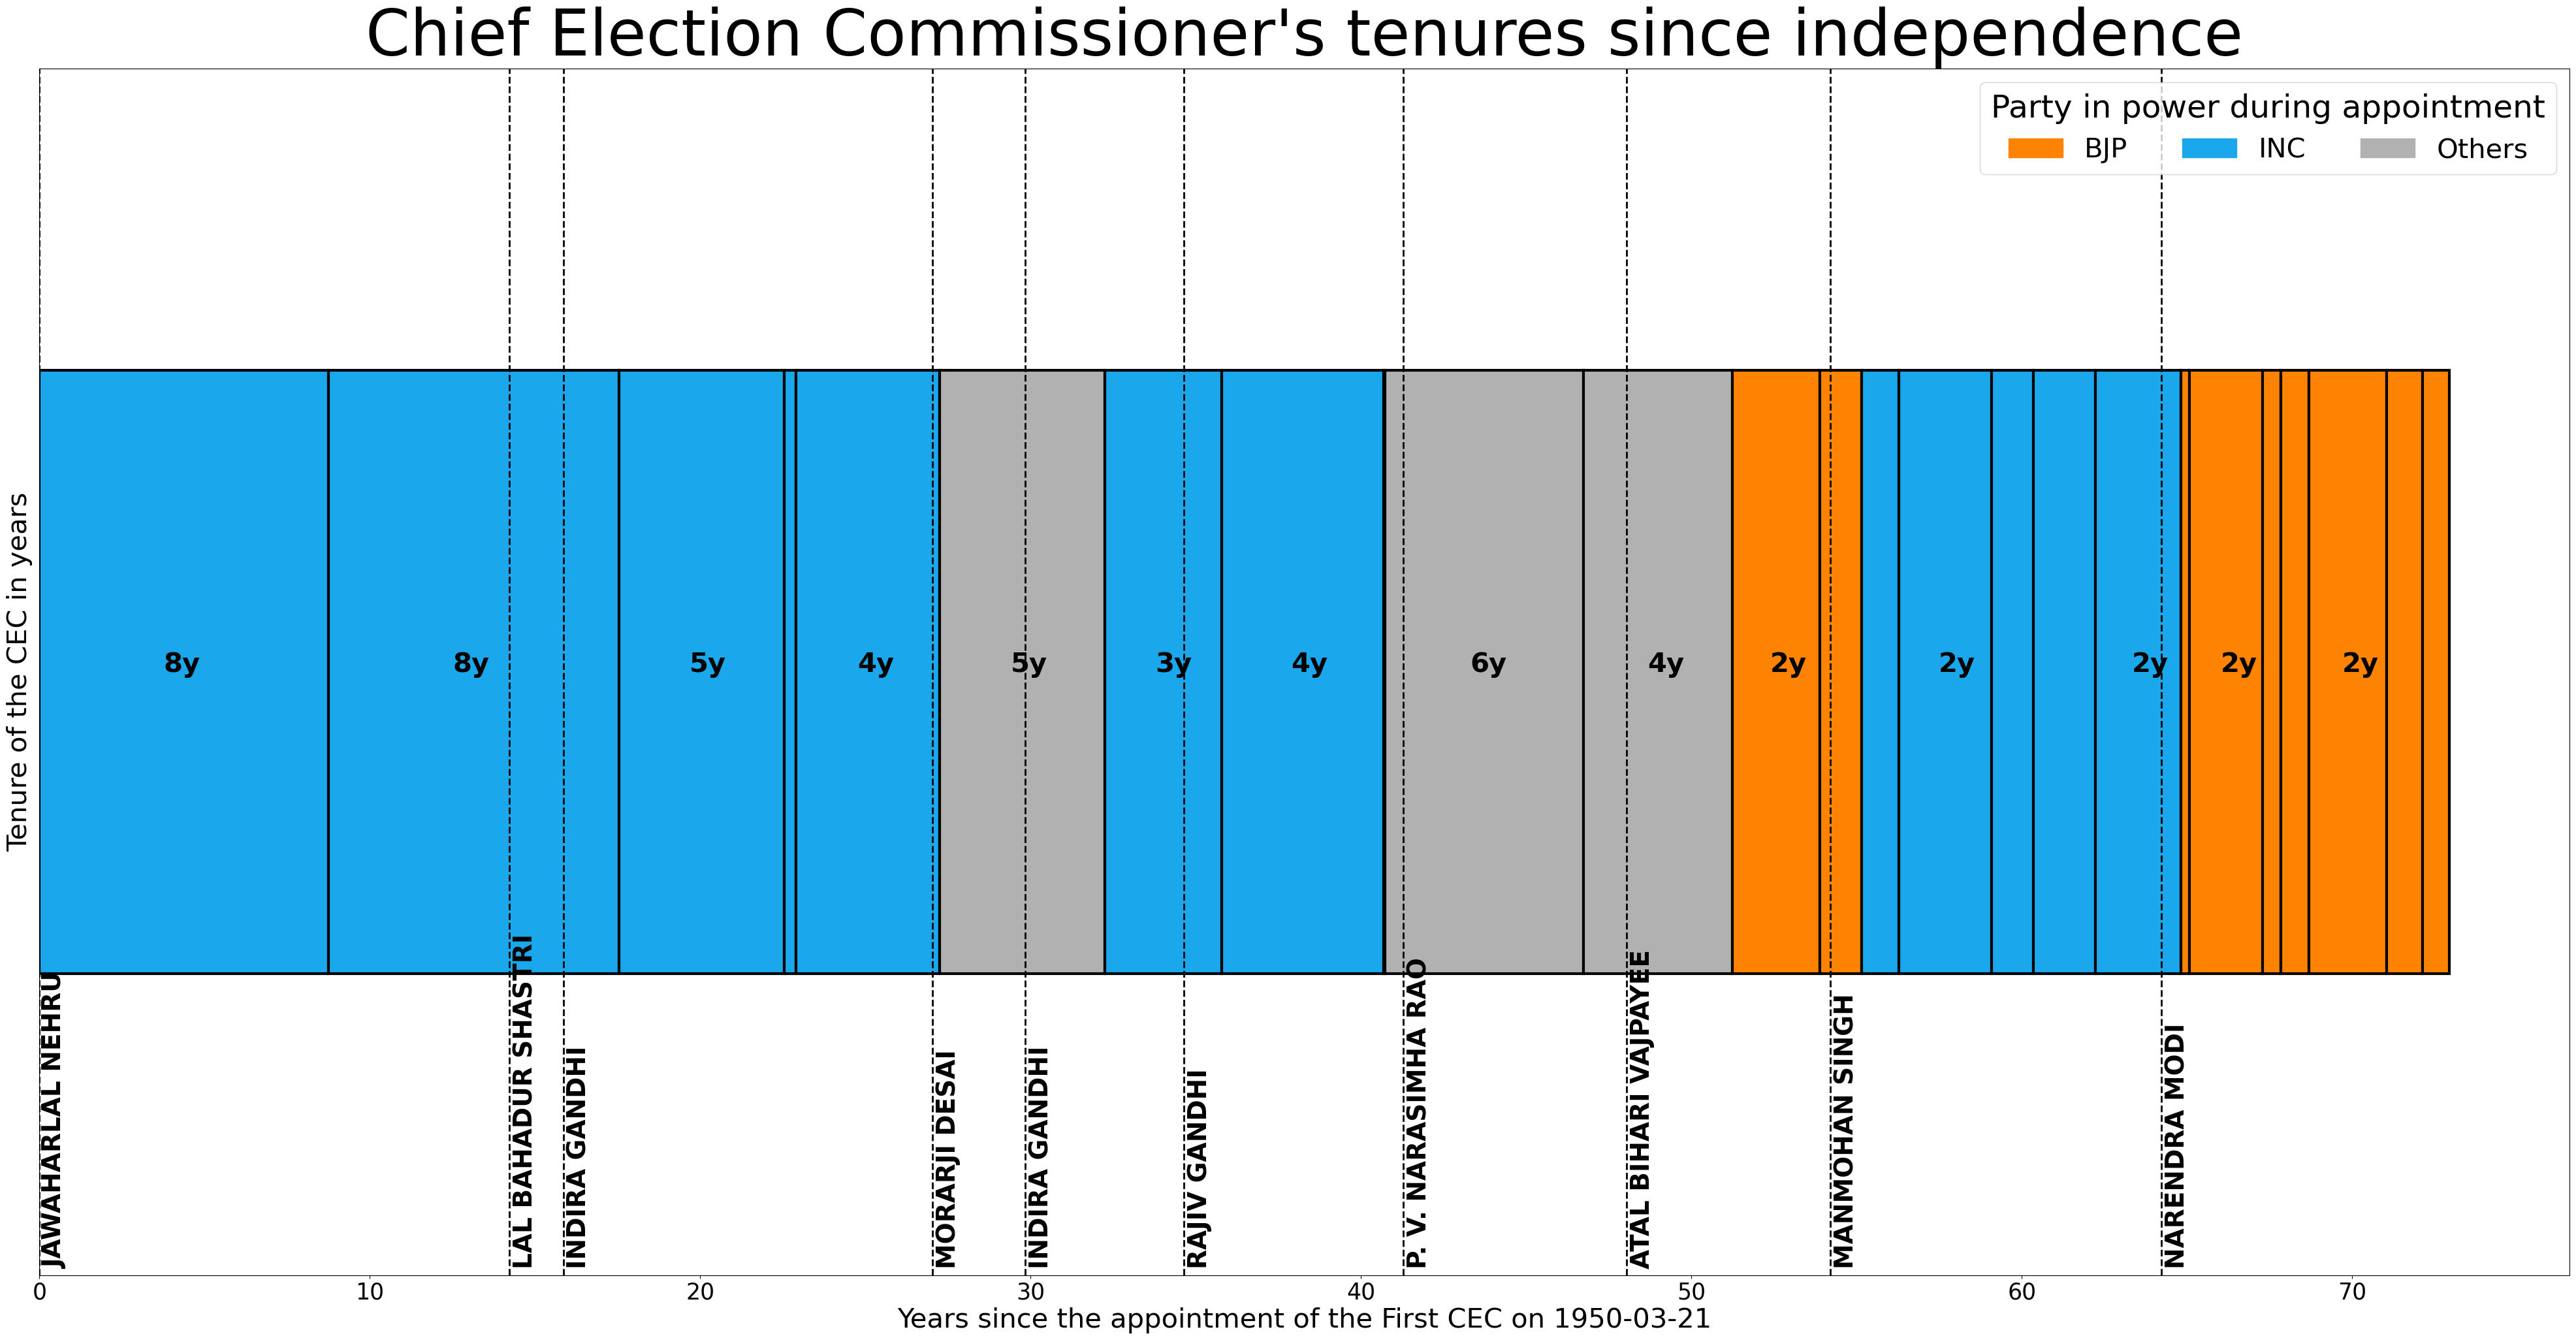

In [67]:
ElectionCommissioners[['Term(years)']].T.plot.barh(stacked=True,
                                                  figsize=(50,24),
                                                 color=colors2,linewidth=3, edgecolor='black')
bjp_patch = mpatches.Patch(color='#ff8303', label='BJP')
inc_patch = mpatches.Patch(color='#1aa7ec', label='INC')
others_patch = mpatches.Patch(color='#b1b1b1', label='Others')


for idx, row in PrimeMinisters_droppedconsecutive.iterrows():
    if idx==0:
        x_cord = 0
    else:
        x_cord = (row['Term Started on']-first_cec_appoined).days/365
        
    plt.axvline(x=x_cord, linestyle='dashed', color='black', linewidth=2)
    pm_name = row['PrimeMinister']
    plt.text(x_cord+0.1,-.49,
             pm_name.upper()
             , rotation=90, fontsize=28
            ,fontweight='bold')
        
x_cord = 0
for idx, row in ElectionCommissioners.iterrows():
    if row['Term(years)'] <2:
        x_cord = x_cord+row['Term(years)']
        continue
    x_cord = x_cord+row['Term(years)']
    plt.text(x_cord-row['Term(years)']/1.75,0,str(int(row['Term(years)']))+'y', rotation=0, fontsize=30,
             fontweight='bold')

plt.yticks([])
plt.xticks(fontsize=25)
plt.ylabel('Tenure of the CEC in years', fontsize=30)        
plt.xlabel('Years since the appointment of the First CEC on 1950-03-21', fontsize=30)       
plt.title("Chief Election Commissioner's tenures since independence", fontsize=70)
plt.legend(handles=[bjp_patch,inc_patch,others_patch], ncol=3, fontsize=30, loc='upper right',
           title='Party in power during appointment', title_fontsize='35')
plt.savefig('CEC_Tenures.jpg', bbox_inches='tight')


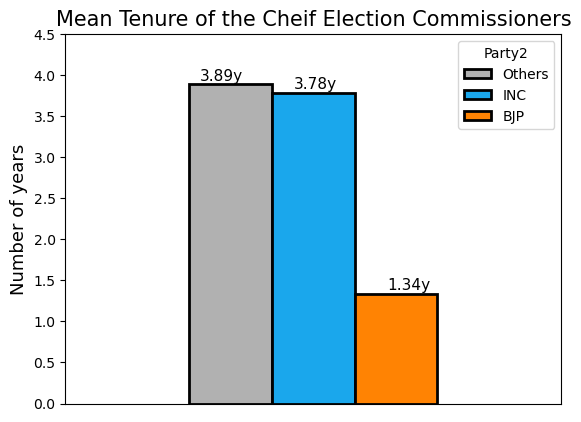

In [11]:
ElectionCommissioners['Party2'] = ElectionCommissioners.Party.replace({'JD':"Others",'JP':"Others",'SJP':"Others"})
party_mean = ElectionCommissioners.groupby('Party2')[['Term(years)']].mean().sort_values('Term(years)',ascending=False)
party_mean.T.plot.bar(color=['#b1b1b1', '#1aa7ec', '#ff8303'], edgecolor='black', linewidth=2)
plt.ylabel('Number of years', fontsize=13)
plt.title('Mean Tenure of the Cheif Election Commissioners', fontsize=15)       
plt.xticks([])

x_cord= -0.23
for idx, row in party_mean.reset_index().iterrows():
    y_cord = row['Term(years)']
    plt.text(x_cord, y_cord+0.05, str(round(row['Term(years)'],2))+'y', rotation=0, fontsize=11)
    x_cord = x_cord + 0.19
plt.ylim(0,4.5)    
plt.savefig('CEC_MeanTenures.jpg', bbox_inches='tight')


In [12]:
ElectionCommissioners

,id,CEC,PM_unique,Term(Days),Term(years),Term Started on,Party,PM,Party2
0,1,Sukumar Sen,Jawaharlal Nehru\n(1889–1964)1,3195,8.753425,1947-08-15,INC,Jawaharlal Nehru,INC
1,2,Kalyan Sundaram,Jawaharlal Nehru\n(1889–1964)3,3206,8.783562,1957-04-17,INC,Jawaharlal Nehru,INC
2,3,S. P. Sen Verma,Indira Gandhi\n(1917–1984)9,1826,5.002740,1967-03-04,INC,Indira Gandhi,INC
3,4,Nagendra Singh,Indira Gandhi\n(1917–1984)10,128,0.350685,1971-03-15,INC,Indira Gandhi,INC
4,5,T. Swaminathan,Indira Gandhi\n(1917–1984)10,1591,4.358904,1971-03-15,INC,Indira Gandhi,INC
5,6,S. L. Shakdhar,Morarji Desai\n(1896–1995)11,1825,5.000000,1977-03-24,JP,Morarji Desai,Others
6,7,R. K. Trivedi,Indira Gandhi\n(1917–1984)13,1292,3.539726,1980-01-14,INC,Indira Gandhi,INC
7,8,R. V. S. Peri Sastri,Rajiv Gandhi\n(1944–1991)15,1789,4.901370,1984-12-31,INC,Rajiv Gandhi,INC
8,9,V. S. Ramadevi,Chandra Shekhar\n(1927–2007)17,15,0.041096,1990-11-10,SJP,Chandra Shekhar,Others
9,10,T. N. Seshan,Chandra Shekhar\n(1927–2007)17,2191,6.002740,1990-11-10,SJP,Chandra Shekhar,Others
